In [1]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

/Users/nimishawalgaonkar/anaconda2/envs/scikit_optimize_develop/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Figure size 432x288 with 0 Axes>

In [2]:
def neg_branin(x):
    y = -1*branin(x)
    return y

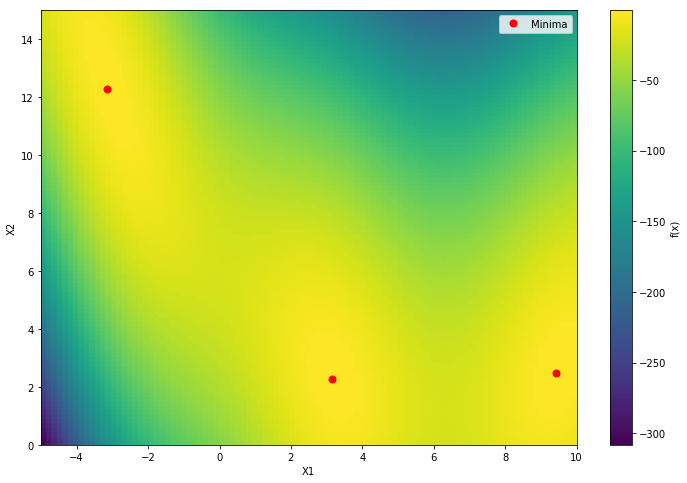

In [4]:
from matplotlib.colors import LogNorm

def plot_neg_branin_with_maxima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([neg_branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx)

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    plt.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_neg_branin_with_maxima()

In [124]:
def plot_neg_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([neg_branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx)
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")
    
    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    plt.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

In [6]:
ntrain = 50 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = neg_branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

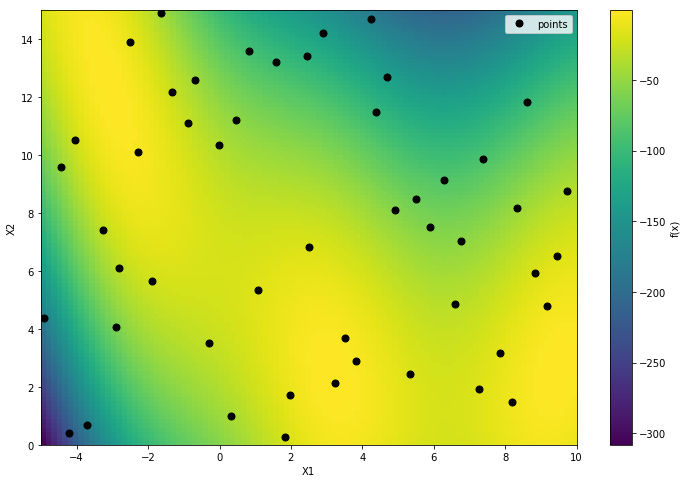

In [7]:
plot_neg_branin_with_points(X_train)

In [8]:
opt = Optimizer(bounds)

In [9]:
opt.tell(X_train.tolist(), Y_train.tolist())

          fun: -218.0782325571445
    func_vals: array([ -38.02139204,   -6.84686835,   -3.84769098,  -46.59864996,
       -106.03068841,  -17.26558586,  -57.94172046,  -12.99403395,
        -37.08600539,  -33.22398312, -138.778057  ,  -44.41353045,
        -20.17648984,  -15.83438464,  -16.37311789,  -21.60955363,
       -177.84822597, -101.88955032,  -59.36459719,  -17.42976814,
        -29.01136075, -137.9990274 ,  -47.63844269,  -15.39186586,
        -28.03105857,  -60.11433157,  -17.99784872, -113.18550174,
        -43.29446292,  -98.12992219,  -26.65863116, -170.3432751 ,
        -30.36408375,  -18.13490032,   -9.10906695,   -3.83218899,
         -6.91201808,   -0.45499341,  -87.91668479,  -53.59800883,
       -171.20195916,  -84.1924601 ,  -26.90390004,  -70.32490478,
       -218.07823256,  -53.36640107,  -39.32534174,  -11.68385873,
        -94.2446718 ,   -3.72747342])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(le

In [10]:
model = opt.models[-1]

In [11]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [12]:
x_model = opt.space.transform(X_grid.tolist())

# GP Posterior Predictive Distribution

In [13]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [14]:
def plot_neg_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx)

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_neg_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx)

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

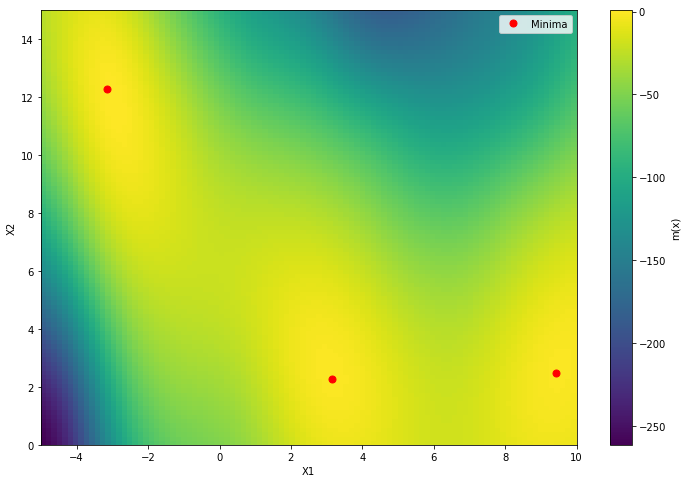

In [15]:
plot_neg_branin_pred(y_pred, x1_values, x2_values)

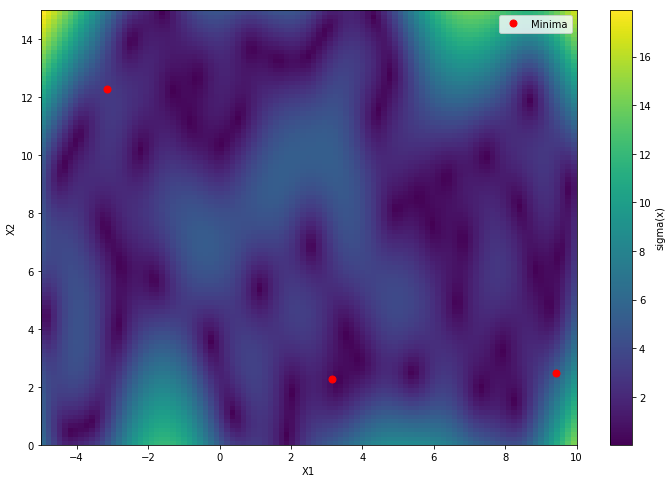

In [17]:
plot_neg_branin_var(sigma, x1_values, x2_values)

In [19]:
from rpy2.robjects.packages import STAP

In [20]:
with open('qEI_call.r', 'r') as f:
    string = f.read()
qEI = STAP(string, "qEI_call")

In [126]:
num_dim = 2
num_test_batches = 10000
num_sampled_points = 3
sampling_strategy = 'LHS'
norm = True # we need to do unnormalization of LHS sampled points

In [127]:
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

In [128]:
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
rcpp = importr("Rcpp")
rcpp.sourceCpp('qEI.cpp')
batches = []
max_obj = np.max(Y_train)
cc_vec = np.zeros(num_test_batches)
for i in range(num_test_batches):
    if sampling_strategy == 'LHS': 
        b = lhs(num_dim, num_sampled_points)
    else:
        print ("No such sampling strategy exists ..")
    
    if norm == True:
        #print ('Unnormalizing the LHS sampling based points')
        b[:,0] = b[:,0]*15 - 5.
        b[:,1] = b[:,1]*15
    else:
        b = b
        
    b_model = opt.space.transform(b.tolist())
    batches.append(b)
    mean, covar = model.predict(b_model, return_cov=True)
    cc = qEI.qEI_approx(mean, covar, max_obj)
    cc_num = rpyn.ri2py(cc)
    cc_vec[i] = cc_num

max_qEI_val = np.max(cc_vec)
max_qEI_val_ind = np.argmax(cc_vec)
best_batch = batches[max_qEI_val_ind]

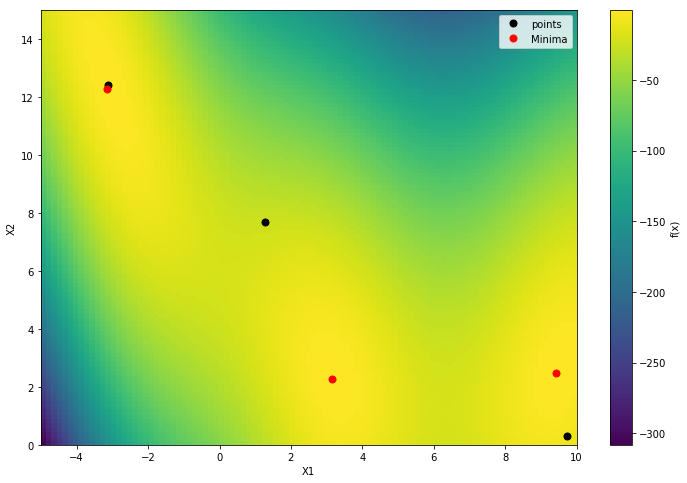

In [129]:
plot_neg_branin_with_points(np.array(best_batch))

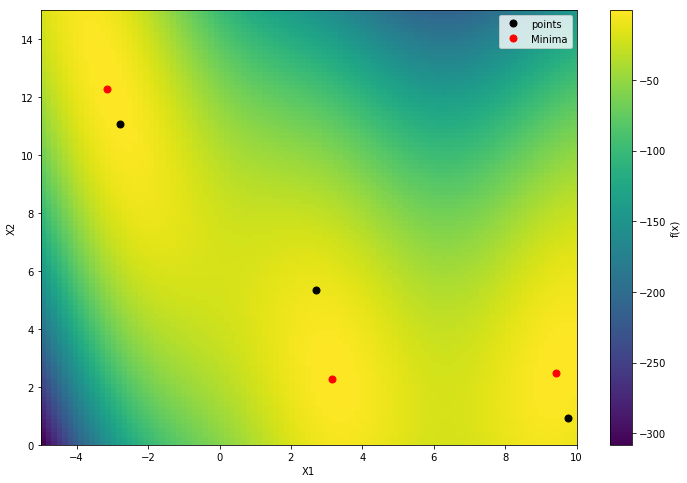

In [175]:
num_dim = 2
num_test_batches = 10000
num_sampled_points = 3
sampling_strategy = 'LHS'
norm = True # we need to do unnormalization of LHS sampled points


from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
rcpp = importr("Rcpp")
rcpp.sourceCpp('qEI.cpp')
batches = []
max_obj = np.max(Y_train)
cc_vec = np.zeros(num_test_batches)
for i in range(num_test_batches):
    if sampling_strategy == 'LHS': 
        b = lhs(num_dim, num_sampled_points)
    else:
        print ("No such sampling strategy exists ..")
    
    if norm == True:
        #print ('Unnormalizing the LHS sampling based points')
        b[:,0] = b[:,0]*15 - 5.
        b[:,1] = b[:,1]*15
    else:
        b = b
        
    b_model = opt.space.transform(b.tolist())
    batches.append(b)
    mean, covar = model.predict(b_model, return_cov=True)
    cc = qEI.qEI_approx(mean, covar, max_obj)
    cc_num = rpyn.ri2py(cc)
    cc_vec[i] = cc_num

max_qEI_val = np.max(cc_vec)
max_qEI_val_ind = np.argmax(cc_vec)
best_batch = batches[max_qEI_val_ind]

plot_neg_branin_with_points(np.array(best_batch))

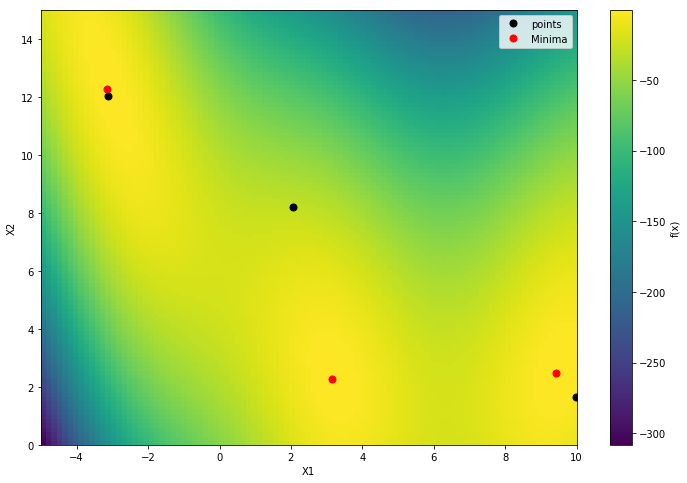

In [176]:
num_dim = 2
num_test_batches = 100000
num_sampled_points = 3
sampling_strategy = 'LHS'
norm = True # we need to do unnormalization of LHS sampled points


from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri as rpyn
rcpp = importr("Rcpp")
rcpp.sourceCpp('qEI.cpp')
batches = []
max_obj = np.max(Y_train)
cc_vec = np.zeros(num_test_batches)
for i in range(num_test_batches):
    if sampling_strategy == 'LHS': 
        b = lhs(num_dim, num_sampled_points)
    else:
        print ("No such sampling strategy exists ..")
    
    if norm == True:
        #print ('Unnormalizing the LHS sampling based points')
        b[:,0] = b[:,0]*15 - 5.
        b[:,1] = b[:,1]*15
    else:
        b = b
    
    #minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    #b = np.vstack([b,minima])
    b_model = opt.space.transform(b.tolist())
    batches.append(b)
    mean, covar = model.predict(b_model, return_cov=True)
    cc = qEI.qEI_approx(mean, covar, max_obj)
    cc_num = rpyn.ri2py(cc)
    cc_vec[i] = cc_num

max_qEI_val = np.max(cc_vec)
max_qEI_val_ind = np.argmax(cc_vec)
best_batch = batches[max_qEI_val_ind]

plot_neg_branin_with_points(np.array(best_batch))

In [172]:
np.max(cc_vec)

5.133765573173165

In [177]:
minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
min_model = opt.space.transform(minima.tolist())
mean, covar = model.predict(min_model, return_cov=True)
cd = qEI.qEI_approx(mean, covar, max_obj)
opt_num = rpyn.ri2py(cd)

In [180]:
opt_num

array([3.52035304])

In [166]:
np.max(cc_vec)

2.6384718801075175

In [179]:
mean

array([ 0.67450235, -0.29966326, -0.60913735])

In [181]:
covar

array([[ 9.20044761e+00,  2.12132733e-03, -9.64114614e-05],
       [ 2.12132733e-03,  1.99994571e-01, -7.14743432e-03],
       [-9.64114614e-05, -7.14743432e-03,  2.91156347e+01]])

In [157]:
batches[1]

array([[-4.12443881, 13.9228688 ],
       [ 0.55936281,  4.40731548],
       [ 8.73074893,  5.75307194]])